# Classification on Iris Dataset
The iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCL Machine Learning Repository.

Iris is the family in the flower which contains the several species such as the iris-selosa, iris-versicolor, iris-virginica, etc.

In [2]:
import pandas as pd
iris = pd.read_csv("iris.csv",index_col = 0)
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

The Iris dataset contains 150 rows and 5 columns. There are 4 features 

In [4]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are 3 classes on the Species, they are:
1. Iris-setosa
2. Iris-versicolor
3. Iris-virginica

In [5]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Each class on Iris dataset has the same amount of data.

If the data is imbalanced, we can perform SMOTE (Synthetic Minority Oversampling Technique)

## Checking for Missing Values

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


The dataset does not contain any missing values

## Checking for Outliers

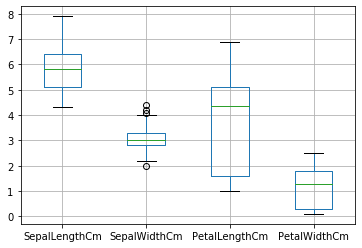

In [7]:
iris.boxplot(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

In [8]:
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(iris._get_numeric_data()))
outlier = iris[(z < 3).all(axis = 1)]
print(outlier.shape)

(149, 5)


In [9]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], iris.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,149
1,Outlier,1


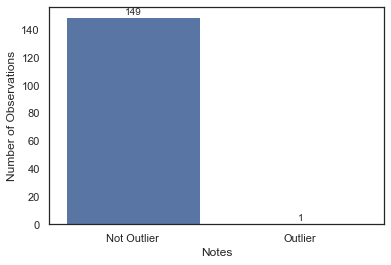

In [10]:
import seaborn as sns

sns.set(style = "white") #darkgrid, whitegrid, dark, white, ticks
plot = sns.barplot(x = "Notes", y = "Number of Observations", data = pd_outlier)

#Adding the Text Labels
rects = plot.patches
labels = pd_outlier['Number of Observations']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 10)

There is 1 multivariate outlier.

### Overcoming The Existence of Outliers

In [11]:
from sklearn import preprocessing

features = iris.iloc[:,0:4]
features_normalized = preprocessing.normalize(features, norm='l2')
features_normalized = pd.DataFrame(features_normalized, columns = features.columns.tolist())
features_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


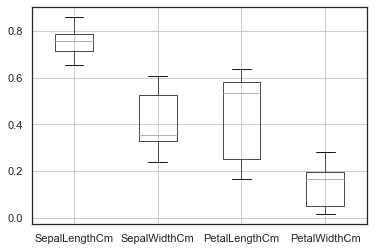

In [12]:
features_normalized.boxplot(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

There are no longer outliers in any variable. 

In [13]:
z = np.abs(stats.zscore(features_normalized._get_numeric_data()))
outlier = features_normalized[(z < 3).all(axis = 1)]
print(outlier.shape)

(150, 4)


In [14]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], features_normalized.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,150
1,Outlier,0


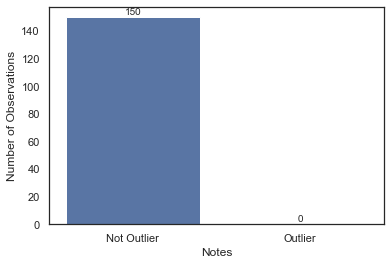

In [22]:
import seaborn as sns

sns.set(style = "white") #darkgrid, whitegrid, dark, white, ticks
plot = sns.barplot(x = "Notes", y = "Number of Observations", data = pd_outlier)

#Adding the Text Labels
rects = plot.patches
labels = pd_outlier['Number of Observations']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2, height + 0.2, label, ha = 'center', va = 'bottom', fontsize = 10)

There are also no longer multivariate outliers.

## Cross Validation

In [28]:
x = features_normalized
y = iris.iloc[:,4]

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#scoring = make_scorer(accuracy_score)
#scoring = make_scorer(precision_score)
#scoring = make_scorer(precision_score, average = 'macro')
#scoring = make_scorer(recall_score, average = 'macro')
scoring = make_scorer(f1_score, average = 'macro')

clf = KNeighborsClassifier(n_neighbors = 3, p = 2)
scores = cross_val_score(clf, x, y, cv = 5, scoring = scoring)
scores

array([1.        , 1.        , 0.96658312, 0.93333333, 1.        ])

In [30]:
print("Cross Validation Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validation Score: 0.98 (+/- 0.05)


In [31]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
clf = KNeighborsClassifier(n_neighbors = 3, p = 2)
scores = cross_validate(clf, x, y, scoring = scoring)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [32]:
scores['test_f1_macro']

array([1.        , 1.        , 0.96658312, 0.93333333, 1.        ])

## Splitting Results using K-Fold Cross Validation vs Stratified K-Fold Cross Validation

In [33]:
# To run the codes below, the Label type must be integer
# Therefore we should perform label Encoding

le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)

print('y: ', y)
print('\n')
print('y_encoded: ', y_encoded)

y:  Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object


y_encoded:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [35]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

# print the splitting results using K-Fold
print("Splitting Results using K-Fold Cross Validation")
kf = KFold(n_splits = 5, random_state = 0, shuffle = False)
for train_index, test_index in kf.split(x):
    print('Train - {} | Test - {}'.format(np.bincount(y_encoded[train_index]), np.bincount(y_encoded[test_index])))
    
print("\n")

# Print the splitting results using Stratified K-Fold
print("Splitting Results using Stratified K-Fold Cross Validation")
skf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = False)
for train_index, test_index in skf.split(x, y_encoded):
    print('Train - {} | Test - {}'.format(np.bincount(y_encoded[train_index]), np.bincount(y_encoded[test_index])))

Splitting Results using K-Fold Cross Validation
Train - [20 50 50] | Test - [30]
Train - [30 40 50] | Test - [20 10]
Train - [50 20 50] | Test - [ 0 30]
Train - [50 40 30] | Test - [ 0 10 20]
Train - [50 50 20] | Test - [ 0  0 30]


Splitting Results using Stratified K-Fold Cross Validation
Train - [40 40 40] | Test - [10 10 10]
Train - [40 40 40] | Test - [10 10 10]
Train - [40 40 40] | Test - [10 10 10]
Train - [40 40 40] | Test - [10 10 10]
Train - [40 40 40] | Test - [10 10 10]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Model Evaluation using K-Fold Cross Validation or Stratified K-Fold Cross Validation 

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_train = []
accuracy_test = []

# for train_index, test_index in kf.split(x): # To perform K-Fold Cross Validation
for train_index, test_index in skf.split(x, y): # To perform Stratified K-Fold Cross Validation
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print('Train - {} | Test - {}\n'.format(np.bincount(y_encoded[train_index]), np.bincount(y_encoded[test_index])))
    
    clf = KNeighborsClassifier(n_neighbors = 3, p = 2)
    clf.fit(x_train, y_train)
    y_fit = clf.predict(x_train)
    y_predict = clf.predict(x_test)
    
    cm_test = confusion_matrix(y_predict, y_test)
    accuracy_train_fold = accuracy_score(y_train, y_fit)
    accuracy_train.append(accuracy_train_fold)
    accuracy_test_fold = accuracy_score(y_test, y_predict)
    accuracy_test.append(accuracy_test_fold)
    
    print('Train Index - {} \n\nTest Index - {}\n'.format(train_index, test_index))
    print("Accuracy Train:", accuracy_train_fold)
    print("Accuracy Test:", accuracy_test_fold)
    print("\n")
    
print("Average Accuracy Train :", np.mean(accuracy_train))
print("Average Accuracy Test :", np.mean(accuracy_test))

Train - [40 40 40] | Test - [10 10 10]

Train Index - [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 

Test Index - [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]

Accuracy Train: 0.9833333333333333
Accuracy Test: 1.0


Train - [40 40 40] | Test - [10 10 10]

Train Index - [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  7